In [26]:
import json
from PIL import Image
from tqdm import tqdm

In [27]:
with open('./data/voronoi_h-8100-16200-2500.json', 'r', encoding='utf-8') as f:
    v_data = json.load(f)

In [28]:
with open('./pm_data/2017.json', 'r', encoding='utf-8') as f:
    pmdata = json.load(f)

In [29]:
def map_value_to_gradient_color(value, min_value=0, max_value=130):
    # 定义从淡橙色到深橙红色的渐变颜色系列
    gradient_colors = [
        (255, 200, 100),  # 淡橙色
        (255, 180, 80),
        (255, 160, 60),
        (255, 140, 40),
        (255, 120, 20),
        (255, 100, 0),   # 明亮的橙色
        (235, 90, 0),
        (215, 80, 0),
        (195, 70, 0),
        (175, 60, 0)    # 深橙红色
    ]
    # 计算每段的大小
    range_size = (max_value - min_value) / len(gradient_colors)
    
    # 确定数值所在的段
    index = int((value - min_value) / range_size)
    
    # 防止越界
    if index >= len(gradient_colors):
        index = len(gradient_colors) - 1
    
    return gradient_colors[index]

In [30]:
def paint_map(data, filename):
    width = len(data[0])
    height = len(data)
    image = Image.new('RGB', (width, height))
    put_pixel  = image.putpixel
    print("******绘制图像******")
    for row in tqdm(range(height)):
        for col in range(width):
            # 当data[row][col]上下左右的数值不同时 color为黑色
            if row > 0 and data[row][col] != data[row-1][col]:
                color = (0, 0, 0)
            elif row < height-1 and data[row][col] != data[row+1][col]:
                color = (0, 0, 0)
            elif col > 0 and data[row][col] != data[row][col-1]:
                color = (0, 0, 0)
            elif col < width-1 and data[row][col] != data[row][col+1]:
                color = (0, 0, 0)
            else:
                color = map_value_to_gradient_color(pmdata[str(data[row][col])], 0, 50)
            put_pixel((col, row), (color[0], color[1], color[2]))
    image.save(f"{filename}.jpg")

In [31]:
paint_map(v_data, "img/pm-2017")

******绘制图像******


  0%|          | 0/8100 [00:00<?, ?it/s]

100%|██████████| 8100/8100 [05:34<00:00, 24.20it/s]


In [32]:
vals = []
for key, val in pmdata.items():
    vals.append(val)
min(vals), max(vals)

(5.338861465454102, 71.86572265625)

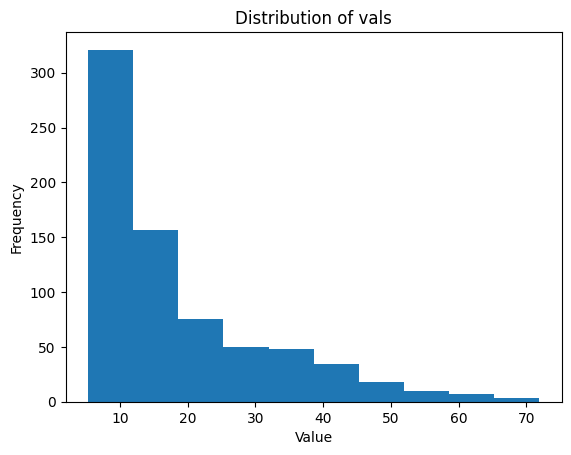

In [33]:
import matplotlib.pyplot as plt

plt.hist(vals, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of vals')
plt.show()
